<a href="https://colab.research.google.com/github/ggoddll99/24-2ESAA/blob/main/240916_%EA%B3%BC%EC%A0%9C_%EC%BA%90%EA%B8%80(%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'drug200:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2617198%2F4471648%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240920%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240920T053423Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3201a52c7872122c26981daa624f6ded114eff814d6c30d90b940477926b25f4e53503047d5b7ce592ebda67b86404cf3848d01150ab38f97503cb6cef66b8cab365bbdd874a617ece80fd084699bab37dfabf197abb76db2ae339d07baa47b577c157b8893cdb29db221808c73025bde4f583d99a1bc72f0fd4dc45bd0d06f2ab690cc5a6c63cb98f3a5eb702503379c53edac57131f6dc428fd163cc2476afb0146324e00de53f570a42433689f17af927e96875086b94fa6a6eb199944055f0c1c91d60d5388e7f5d3674ff68756beb66077795a670f6e6640352ae640e43d8afdfefa9fc78210a0d55a241163bcd6a9227bb88f0e9e8b77f81fbda8d5287'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1716 bytes downloaded
Downloaded and uncompressed: drug200
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug200/drug200.csv


# Data Review

In [3]:
data=pd.read_csv("/kaggle/input/drug200/drug200.csv")

In [4]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
numeric_data = data.select_dtypes(include=['number'])
numeric_data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


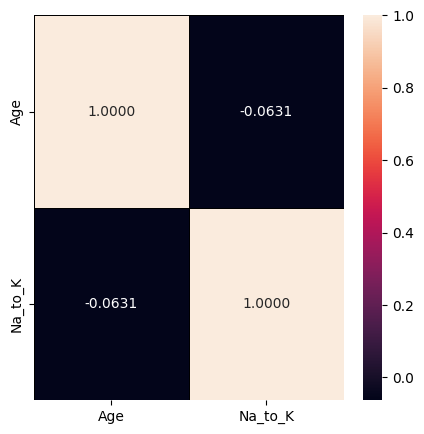

In [8]:
f, ax=plt.subplots(figsize=(5, 5))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.4f', ax=ax)
plt.show()

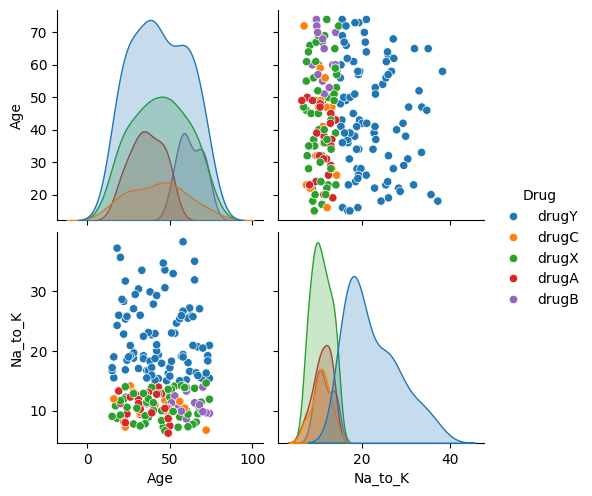

In [9]:
import warnings

data.replace([np.inf, -np.inf], np.nan, inplace=True)
warnings.filterwarnings("ignore")

sns.pairplot(data, hue='Drug')

In [10]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
data['Age'].value_counts(dropna=False)

,count
Age,
47,8
23,7
28,7
49,7
39,6
32,6
50,5
37,5
58,5


In [12]:
data['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [13]:
data['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [14]:
data['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


In [15]:
data['Drug'].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


# Data Visualization

In [16]:
dataAge=data['Age'].value_counts(dropna=False)
npar_dataAge=np.array(dataAge)
x=list(npar_dataAge)
y=data.Age.value_counts().index

DataAge={'Age':y, 'Number':x}
DataAge=pd.DataFrame(DataAge)

fig=px.bar(DataAge, x='Age', y='Number')
fig.show()

In [17]:
colors=['gold', 'mediumturquoise']

fig=go.Figure(data=[go.Pie(labels=['M', 'F'], values=[104, 96])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [18]:
fig=px.bar(x=['HIGH', 'LOW', 'NORMAL'], y=[77, 64, 59])
fig.show()

In [19]:
fig=px.histogram(x=['HIGH', 'NORMAL'], y=[103, 97])
fig.show()

In [20]:
fig=go.Figure(data=[go.Pie(labels=['DrugY', 'DrugX', 'DrugA', 'DrugC', 'DrugB'], values=[91, 54, 23, 16, 16])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, marker=dict(colors=px.colors.sequential.RdBu, line=dict(color='#000000', width=2)))
fig.show()

In [21]:
fig=px.scatter(data, x='Na_to_K', y='Age', color='Drug', size='Age', hover_data=['Na_to_K'])
fig.show()

# Classifications Models

## Data Preparing

In [22]:
dataclass=pd.read_csv('/kaggle/input/drug200/drug200.csv')

In [23]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [24]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [25]:
dataclass.Sex=[1 if i=='F' else 0 for i in dataclass.Sex]

In [26]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [27]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0, len(dataclass.BP)):
    if dataclass.BP[i]=='LOW':
        dataclass.BP[i]=2

    elif dataclass.BP[i]=='NORMAL':
        dataclass.BP[i]=1
    else:
        dataclass.BP[i]=0

In [28]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,drugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,HIGH,11.567,drugC
196,16,0,2,HIGH,12.006,drugC
197,52,0,1,HIGH,9.894,drugX
198,23,0,1,NORMAL,14.020,drugX


In [29]:
dataclass.Cholesterol=[1 if i=='HIGH' else 0 for i in dataclass.Cholesterol]

In [30]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,drugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,1,1,9.894,drugX
198,23,0,1,0,14.020,drugX


In [31]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0, len(dataclass)):
    if dataclass.Drug[i]=='drugY':
        dataclass.Drug[i]=4
    elif dataclass.Drug[i]=='drugX':
        dataclass.Drug[i]=3
    elif dataclass.Drug[i]=='drugA':
        dataclass.Drug[i]=2
    elif dataclass.Drug[i]=='drugC':
        dataclass.Drug[i]=1
    else:
        dataclass.Drug[i]=0

In [32]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,4
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,4
...,...,...,...,...,...,...
195,56,1,2,1,11.567,1
196,16,0,2,1,12.006,1
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [33]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


In [34]:
data_types_dict={'BP':int, 'Drug':int}
dataclass=dataclass.astype(data_types_dict)
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [35]:
x_data=dataclass.drop(['Drug'], axis=1)
y_data=dataclass.Drug.values

In [36]:
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,1,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [37]:
y_data

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.3, random_state=1)

## Decision Tree Classifier
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc=DecisionTreeClassifier()

dtc.fit(x_train, y_train)
predict=dtc.predict(x_test)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(predict, y_test))

The accuracy of the Decision Tree is 0.9666666666666667


DecisionTreeClassifier with 'gini'

In [40]:
DTC_gini=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DTC_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [41]:
y_pred_gini=DTC_gini.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index : {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index : 0.9000


In [43]:
y_pred_train_gini=DTC_gini.predict(x_train)
y_pred_train_gini

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [44]:
print('Training-set accuracy score : {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score : 0.9143


In [45]:
print('Training set score : {:.4f}'.format(DTC_gini.score(x_train, y_train)))
print('Test set score : {:.4f}'.format(DTC_gini.score(x_test, y_test)))

Training set score : 0.9143
Test set score : 0.9000


DecisionTreeClassifier with 'entropy'

In [46]:
DTC_en=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DTC_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [47]:
y_pred_en=DTC_en.predict(x_test)

In [48]:
print('Model accuracy score with criterion entropy : {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy : 0.9000


In [49]:
y_pred_train_en=DTC_en.predict(x_train)
y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [50]:
print('Training-set accuracy score : {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score : 0.9143


In [51]:
print('Training set score : {:.4f}'.format(DTC_en.score(x_train, y_train)))
print('Test set score : {:.4f}'.format(DTC_en.score(x_test, y_test)))

Training set score : 0.9143
Test set score : 0.9000


## RandomForest Classifier
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=0)

rfc.fit(x_train, y_train)

predict=rfc.predict(x_test)

print('The accuracy of the Random Forest is', metrics.accuracy_score(predict, y_test))

The accuracy of the Random Forest is 0.95


RandomForest Classifier with 'n_estimators=100'

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc_100=RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(x_train, y_train)
predict=rfc_100.predict(x_test)
print('The accuracy of the Random Forest is', metrics.accuracy_score(predict, y_test))

The accuracy of the Random Forest is 0.95


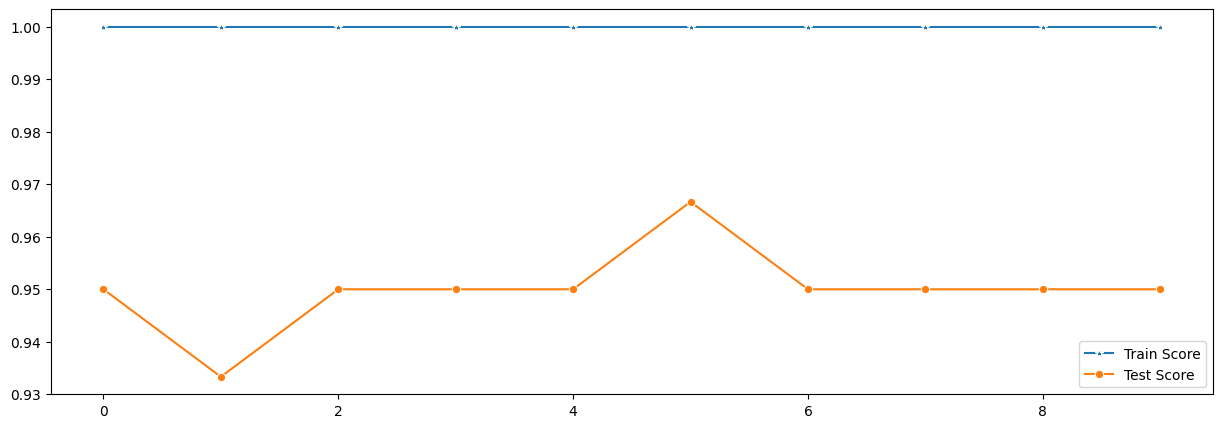

In [54]:
test_score_list=[]
train_score_list=[]

for i in range(0, 10):
    rfc2=RandomForestClassifier(random_state=i)
    rfc2.fit(x_train, y_train)
    test_score_list.append(rfc2.score(x_test, y_test))
    train_score_list.append(rfc2.score(x_train, y_train))

plt.figure(figsize=(15, 5))
p=sns.lineplot(x=range(0, 10), y=train_score_list, marker='*', label='Train Score')
p=sns.lineplot(x=range(0, 10), y=test_score_list, marker='o', label='Test Score')

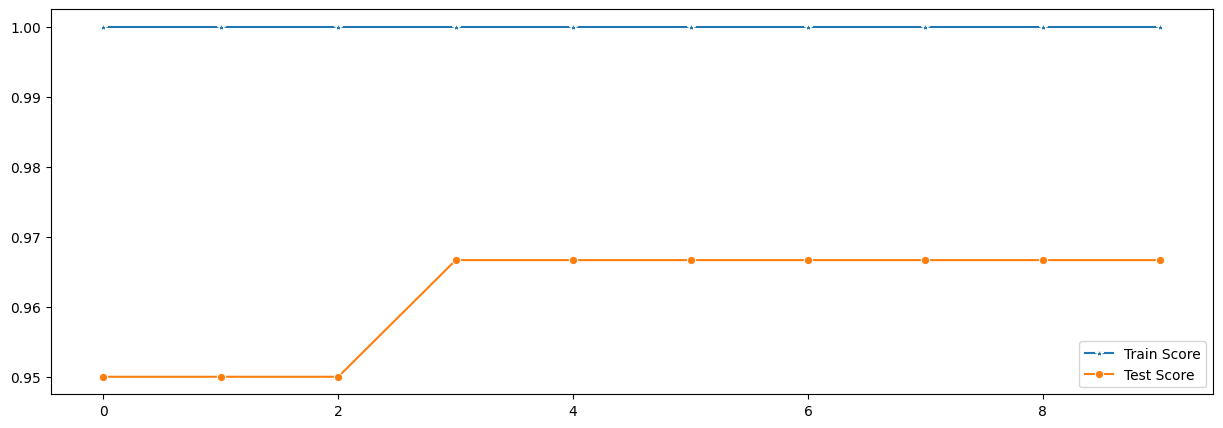

In [55]:
test_score_list=[]
train_score_list=[]

list_n_estimators=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in range(0, len(list_n_estimators)):
    rfc3=RandomForestClassifier(n_estimators=list_n_estimators[i], random_state=5)
    rfc3.fit(x_train, y_train)
    test_score_list.append(rfc3.score(x_test, y_test))
    train_score_list.append(rfc3.score(x_train, y_train))

plt.figure(figsize=(15, 5))
p=sns.lineplot(x=range(0, len(list_n_estimators)), y=train_score_list, marker='*', label='Train Score')
p=sns.lineplot(x=range(0, len(list_n_estimators)), y=test_score_list, marker='o', label='Test Score')

RandomForest Classifier with the best parameters

In [58]:
last_rfc=RandomForestClassifier(n_estimators=100, random_state=5)
last_rfc.fit(x_train, y_train)
predict=last_rfc.predict(x_test)
print('The accuracy of the Random Forest is', metrics.accuracy_score(predict, y_test))

The accuracy of the Random Forest is 0.9666666666666667


In [59]:
y_pred_en=last_rfc.predict(x_test)
print('Model accuracy score with best parameters : {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with best parameters : 0.9667


In [60]:
y_pred_train_en=last_rfc.predict(x_train)
y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 1, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 1, 3, 2, 3, 4, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3,
       1, 0, 0, 2, 4, 3, 4, 1, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 1, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 2, 3, 1, 1, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [61]:
print('Training-set accuracy score : {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score : 1.0000


In [62]:
print('Training set score : {:.4f}'.format(last_rfc.score(x_train, y_train)))
print('Test set score : {:.4f}'.format(last_rfc.score(x_test, y_test)))

Training set score : 1.0000
Test set score : 0.9667


## Evaluation Classification Models
Evaluating the performance of a Machine learning model is one of the important steps while building an effective ML model. To evaluate the performance or quality of the model, different metrics are used, and these metrics are known as performance metrics or evaluation metrics.

### Confusion Matrix
A confusion matrix is a tabular representation of prediction outcomes of any binary classifier, which is used to describe the performance of the classification model on a set of test data when true values are known.

Confusion Matrix for DecisionTreeClassifier Without Parameters

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cm_des=DecisionTreeClassifier()

cm_des.fit(x_train, y_train)
y_pred_cm=cm_des.predict(x_test)
y_true=y_test

cm_des1=confusion_matrix(y_true, y_pred_cm)
cm_des1

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

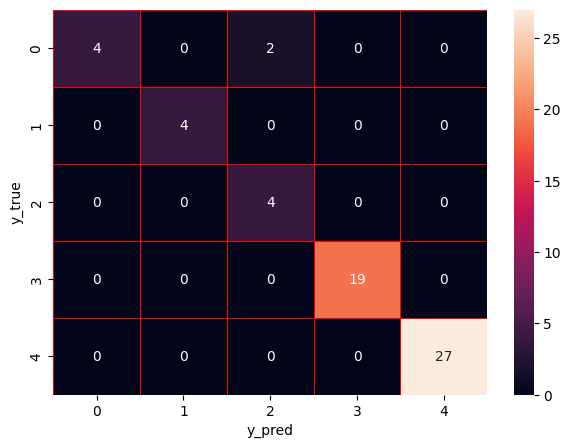

In [64]:
f, ax=plt.subplots(figsize=(7, 5))
sns.heatmap(cm_des1, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

Confusion Matrix For Decision Tree Classifier With 'gini'

In [65]:
cm_des_gini=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

cm_des_gini.fit(x_train, y_train)
y_pred_cm=cm_des_gini.predict(x_test)
y_true=y_test

cm_des2=confusion_matrix(y_true, y_pred_cm)
cm_des2

array([[ 4,  0,  2,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

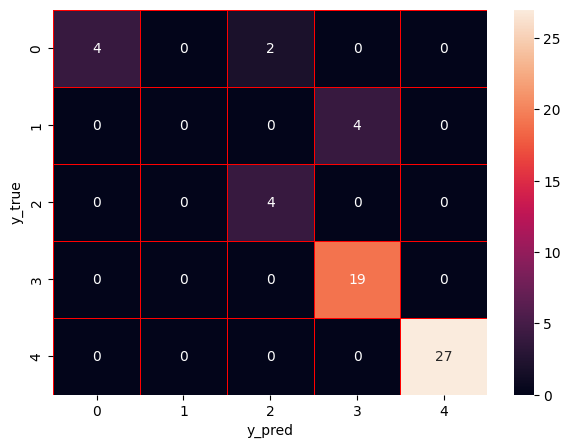

In [66]:
f, ax=plt.subplots(figsize=(7, 5))
sns.heatmap(cm_des2, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

Confusion Matrix For Random Forest Classifier With The Best Parameters

In [67]:
cm_last_rfc=RandomForestClassifier(n_estimators=100, random_state=5)
cm_last_rfc.fit(x_train, y_train)
y_pred_cm=cm_last_rfc.predict(x_test)
y_true=y_test
cm_rfc=confusion_matrix(y_true, y_pred_cm)
cm_rfc

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

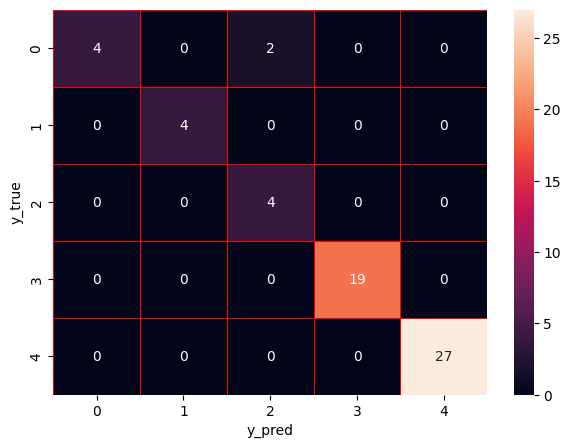

In [68]:
f, ax=plt.subplots(figsize=(7, 5))
sns.heatmap(cm_rfc, annot=True, linewidth=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()